# Module 2: Data Analysis

## Ultimate 25k+ Matches Football Database

### Objectives for this Part
* Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
* Practice performing EDA, statistical inference, and prediction.
* Practice working with SQL datasets.
* Practice visualizing data.

provided dataset: https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european

### Requirements
* Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use SQL and Pandas functions to create other additional features.
* Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using SQL or Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
* Perform statistical inference. Raise and test statistical hypotheses. Set appropriate significance levels and create confidence intervals for the variables of interest.
* Train linear machine learning models and use them for forecasting. Use cross validation, information criteria, and/or other methods to specify your models correctly. Choose and use appropriate metrics to measure your models' performance.
* Create a Google Data Studio dashboard with at least three different types of charts.
* Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
* Present the project - the data, methods, and results.
* rovide suggestions about how your analysis can be improved.

### Libraries:

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import sqlite3 as sql
from sqlite3 import connect
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    make_scorer,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
)
from scipy.stats import chi2_contingency, linregress
import xml.etree.ElementTree as ET

%matplotlib inline
print("Setup complete")

Setup complete


<IPython.core.display.Javascript object>

### Data extraction:

In [3]:
conn = sql.connect("database.sqlite")

<IPython.core.display.Javascript object>

In [4]:
query = pd.DataFrame(
    pd.read_sql_query(
        """SELECT name AS table_name, sql AS table_scheme
FROM sqlite_master
Where type = 'table'
ORDER BY table_name""",
        conn,
    )
)
pd.set_option("display.max_colwidth", None)
query

table_name  \
0            Country   
1             League   
2              Match   
3             Player   
4  Player_Attributes   
5               Team   
6    Team_Attributes   
7    sqlite_sequence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<IPython.core.display.Javascript object>

* The data is stored in 7 main tables. We will examine each of them below:

# Data cleaning

* **'Country'** table (11 entries and 2 columns):

In [5]:
country_df = pd.DataFrame(
    pd.read_sql_query(
        """SELECT * FROM Country """,
        conn,
    )
)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


<IPython.core.display.Javascript object>

In [6]:
country_df

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


<IPython.core.display.Javascript object>

* **'League'** table (11 entries and 3 columns):

In [7]:
league_df = pd.DataFrame(
    pd.read_sql_query(
        """SELECT * FROM League """,
        conn,
    )
)
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


<IPython.core.display.Javascript object>

In [8]:
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


<IPython.core.display.Javascript object>

* **'Player'** table (11060 entries, 7 columns):

* Changing player weight from pounds into kilograms and birthday format.

In [9]:
player_df = pd.DataFrame(
    pd.read_sql_query(
        """SELECT player_api_id AS player_id, player_name, strftime('%Y-%m-%d', birthday) AS birthday, height, (weight * 0.45) As weight_kg FROM Player""",
        conn,
    )
)
player_df.birthday = pd.to_datetime(player_df.birthday)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   player_id    11060 non-null  int64         
 1   player_name  11060 non-null  object        
 2   birthday     11060 non-null  datetime64[ns]
 3   height       11060 non-null  float64       
 4   weight_kg    11060 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 432.2+ KB


<IPython.core.display.Javascript object>

In [10]:
player_df.head()

,player_id,player_name,birthday,height,weight_kg
0,505942,Aaron Appindangoye,1992-02-29,182.88,84.15
1,155782,Aaron Cresswell,1989-12-15,170.18,65.70
2,162549,Aaron Doran,1991-05-13,170.18,73.35
3,30572,Aaron Galindo,1982-05-08,182.88,89.10
4,23780,Aaron Hughes,1979-11-08,182.88,69.30


<IPython.core.display.Javascript object>

* **'Player Attributes'** table:

In [11]:
player_attr_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
pd.set_option("display.max_columns", None)
player_attr_df["date"] = pd.to_datetime(player_attr_df["date"], format="%Y-%m-%d")
player_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183142 non-null  float64       
 5   potential            183142 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183142 non-null  float64       
 10  finishing            183142 non-null  float64       
 11  heading_accuracy     183142 non-null  float64       
 12  short_passing        183142 non-null  float64       
 13  volleys       

<IPython.core.display.Javascript object>

In [12]:
player_attr_df = player_attr_df.drop_duplicates(
    subset=["player_api_id", "date", "player_fifa_api_id"]
)
missing_values_player_percent = round(
    player_attr_df.isna().sum() * 100 / len(player_attr_df), 2
)
missing_values_player_percent

id                     0.00
player_fifa_api_id     0.00
player_api_id          0.00
date                   0.00
overall_rating         0.05
potential              0.05
preferred_foot         0.05
attacking_work_rate    1.35
defensive_work_rate    0.05
crossing               0.05
finishing              0.05
heading_accuracy       0.05
short_passing          0.05
volleys                1.07
dribbling              0.05
curve                  1.07
free_kick_accuracy     0.05
long_passing           0.05
ball_control           0.05
acceleration           0.05
sprint_speed           0.05
agility                1.07
reactions              0.05
balance                1.07
shot_power             0.05
jumping                1.07
stamina                0.05
strength               0.05
long_shots             0.05
aggression             0.05
interceptions          0.05
positioning            0.05
vision                 1.07
penalties              0.05
marking                0.05
standing_tackle     

<IPython.core.display.Javascript object>

In [13]:
player_attr_df.shape

(183227, 42)

<IPython.core.display.Javascript object>

* We have deleted the duplicates. After that we have 183227 entries and 42 columns. 
*The percentage of missing values is small, so if necessary they could be deleted if the issues raised by this work so require. The loss of this amount of data would not have much impact on the result.

* **'Team'** table:

* 'Team' table have 299 entries and 4 columns, no missing essential values and no duplicated entries.

In [14]:
team_df = pd.DataFrame(pd.read_sql_query("SELECT * FROM Team", conn))
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


<IPython.core.display.Javascript object>

In [15]:
team_df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [16]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


<IPython.core.display.Javascript object>

* **'Team_Attributes'** table:
* Adjusting date format. Table has 1458 entries, and 25 features, none of them are duplicated:

In [17]:
team_attr_df = pd.DataFrame(
    pd.read_sql_query(
        "SELECT * FROM Team_Attributes",
        conn,
    )
)
team_attr_df["date"] = pd.to_datetime(team_attr_df["date"], format="%Y-%m-%d")
pd.set_option("display.max_columns", None)
team_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            489 non-null    float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

<IPython.core.display.Javascript object>

In [18]:
team_attr_df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* 'buildUpPlayDribbling' column has too many missing values, so we just dropping those:

In [19]:
team_attr_df = team_attr_df.drop("buildUpPlayDribbling", axis=1)

<IPython.core.display.Javascript object>

* The date column is inconsistent, so for future reference I will add an additional column 'Year':

In [20]:
print(team_attr_df.date.unique())
team_attr_df["year"] = team_attr_df["date"].dt.year

['2010-02-22T00:00:00.000000000' '2014-09-19T00:00:00.000000000'
 '2015-09-10T00:00:00.000000000' '2011-02-22T00:00:00.000000000'
 '2012-02-22T00:00:00.000000000' '2013-09-20T00:00:00.000000000']


<IPython.core.display.Javascript object>

In [21]:
team_attr_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,1,434,9930,2010-02-22,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
1,2,434,9930,2014-09-19,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014
2,3,434,9930,2015-09-10,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015
3,4,77,8485,2010-02-22,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010
4,5,77,8485,2011-02-22,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2011


<IPython.core.display.Javascript object>

* **'Match'** table (25979 entries and 115 entries):

In [22]:
match_df = pd.DataFrame(pd.read_sql_query("""SELECT * FROM Match""", conn))

<IPython.core.display.Javascript object>

In [23]:
match_df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [24]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


<IPython.core.display.Javascript object>

In [25]:
pd.set_option("display.max_columns", None)
match_df["date"] = pd.to_datetime(match_df["date"], format="%Y-%m-%d")
match_df["year"] = match_df["date"].dt.year
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,year
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,2008
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,2008
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2008
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,2008
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2008


<IPython.core.display.Javascript object>

* Too many columns, so I'll keep the necessary columns to exclude the betting part. 
* As we cannot confirm at what point in time the betting information was recorded, we will not look into it.

In [26]:
match_df = match_df[
    [
        "league_id",
        "season",
        "year",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "home_team_goal",
        "away_team_goal",
    ]
]
print("Earliest match record: ", match_df.date.min())
print("Last match record: ", match_df.date.max())

Earliest match record:  2008-07-18 00:00:00
Last match record:  2016-05-25 00:00:00


<IPython.core.display.Javascript object>

* Initial analysis shows that this is a large data table covering almost all the major European football countries and leagues. Once the initial data has been organised, we will analyse the following questions.
* Data cover the years 2010-2016.

### **How many teams play in every league?:**

In [27]:
df = pd.DataFrame(pd.read_sql_query(
    """SELECT m.season AS season, l.name AS league, COUNT(DISTINCT m.home_team_api_id) AS team_count
FROM Match m
JOIN League l ON m.league_id = l.id
GROUP BY 1, 2
ORDER BY 1, 2""",
    conn,
))
pivot_df = df.pivot_table(
    index="season", columns="league", values="team_count", aggfunc="sum"
)
pivot_df


league,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
season,,,,,,,,,,,
2008/2009,18,20,20,18,20,18,16,16,12,20,10
2009/2010,15,20,20,18,20,18,16,16,12,20,10
2010/2011,16,20,20,18,20,18,16,16,12,20,10
2011/2012,16,20,20,18,20,18,16,16,12,20,10
2012/2013,16,20,20,18,20,18,16,16,12,20,10
2013/2014,4,20,20,18,20,18,16,16,12,20,10
2014/2015,16,20,20,18,20,18,16,18,12,20,10
2015/2016,16,20,20,18,20,18,16,18,12,20,10


<IPython.core.display.Javascript object>

* Note: we have missing data for Belgium in 2013/2014, and in 2009/2010 one team filed for bancrupcy during the season.

### **How many matches played per league?**

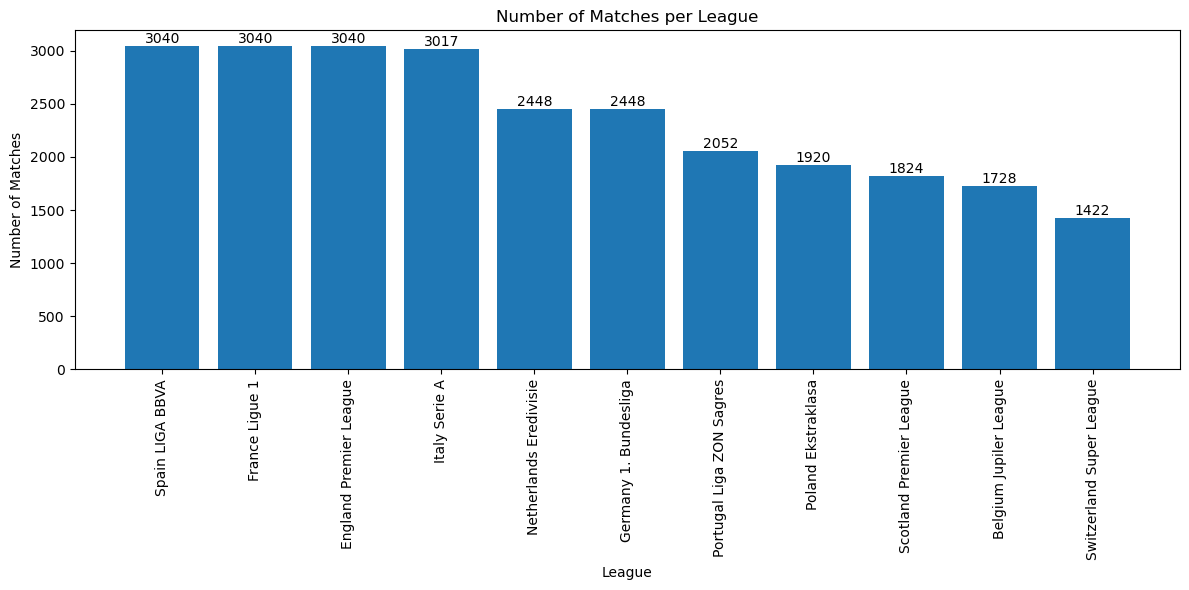

<IPython.core.display.Javascript object>

In [28]:
df_1 = pd.DataFrame(
    pd.read_sql_query(
        """SELECT l.name AS league, COUNT(*) AS match_count 
    FROM League AS l 
    JOIN Match AS m ON l.id = m.league_id 
    GROUP BY 1
    ORDER BY 2 DESC""",
        conn,
    )
)

plt.figure(figsize=(12, 6))
plt.bar(df_1["league"], df_1["match_count"])
plt.xticks(rotation=90)
plt.xlabel("League")
plt.ylabel("Number of Matches")
plt.title("Number of Matches per League")
for i, count in enumerate(df_1["match_count"]):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### **How many matches played per season in every league?**:

In [29]:
df_2 = pd.DataFrame(
    pd.read_sql_query(
        """SELECT m.season AS season, l.name AS league, COUNT(*) AS match_count
    FROM League AS l
    JOIN Match AS m ON l.id = m.league_id
    GROUP BY m.season, l.name
    ORDER BY season""",
        conn,
    )
)
pivot_df = df_2.pivot_table(
    index="season", columns="league", values="match_count", aggfunc="sum"
)
pivot_df

league,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
season,,,,,,,,,,,
2008/2009,306,380,380,306,380,306,240,240,228,380,180
2009/2010,210,380,380,306,380,306,240,240,228,380,180
2010/2011,240,380,380,306,380,306,240,240,228,380,180
2011/2012,240,380,380,306,358,306,240,240,228,380,162
2012/2013,240,380,380,306,380,306,240,240,228,380,180
2013/2014,12,380,380,306,380,306,240,240,228,380,180
2014/2015,240,380,380,306,379,306,240,306,228,380,180
2015/2016,240,380,380,306,380,306,240,306,228,380,180


<IPython.core.display.Javascript object>

### **How many home / away goals were scored in every league for every season?:**

In [30]:
goals = pd.DataFrame(
    pd.read_sql_query(
        """SELECT m.season AS season, l.name AS league,
       SUM(m.home_team_goal) AS home_goals, 
       SUM(m.away_team_goal) AS away_goals
FROM Match m
JOIN League l ON m.league_id = l.id
GROUP BY l.name, m.season
ORDER BY l.name, m.season""",
        conn,
    )
)
pivot_df = goals.pivot_table(
    index="season", columns="league", values=["home_goals", "away_goals"], aggfunc="sum"
)
pivot_df

away_goals                                        \
league    Belgium Jupiler League England Premier League France Ligue 1   
season                                                                   
2008/2009                    356                    410            369   
2009/2010                    257                    408            388   
2010/2011                    253                    446            380   
2011/2012                    270                    462            396   
2012/2013                    328                    471            409   
2013/2014                     12                    454            395   
2014/2015                    292                    415            411   
2015/2016                    292                    459            414   

                                                                      \
league    Germany 1. Bundesliga Italy Serie A Netherlands Eredivisie   
season                                                                 
2008/2009                   374           410                    346   
2009/2010                   403           406                    364   
2010/2011                   390           411                    392   
2011/2012                   367           384                    412   
2012/2013                   411           435                    424   
2013/2014                   432           451                    410   
2014/2015                   357           450                    424   
2015/2016                   387           420                    413   

                                                                               \
league    Poland Ekstraklasa Portugal Liga ZON Sagres Scotland Premier League   
season                                                                          
2008/2009                203                      256                     247   
2009/2010                233                      268                     264   
2010/2011                217                      269                     269   
2011/2012                229                      275                     286   
2012/2013                276                      306                     286   
2013/2014                262                      250                     281   
2014/2015                264                      319                     257   
2015/2016                294                      368                     307   

                                                               home_goals  \
league    Spain LIGA BBVA Switzerland Super League Belgium Jupiler League   
season                                                                      
2008/2009             470                      224                    499   
2009/2010             423                      240                    308   
2010/2011             420                      254                    382   
2011/2012             412                      190                    421   
2012/2013             450                      190                    375   
2013/2014             425                      230                     18   
2014/2015             425                      228                    376   
2015/2016             428                      245                    402   

                                                                       \
league    England Premier League France Ligue 1 Germany 1. Bundesliga   
season                                                                  
2008/2009                    532            489                   520   
2009/2010                    645            528                   463   
2010/2011                    617            510                   504   
2011/2012                    604            560                   508   
2012/2013                    592            558                   487   
2013/2014                    598            538                   535   
2014/2015        

<IPython.core.display.Javascript object>

* To visualize this table we plot totals for every league separately:

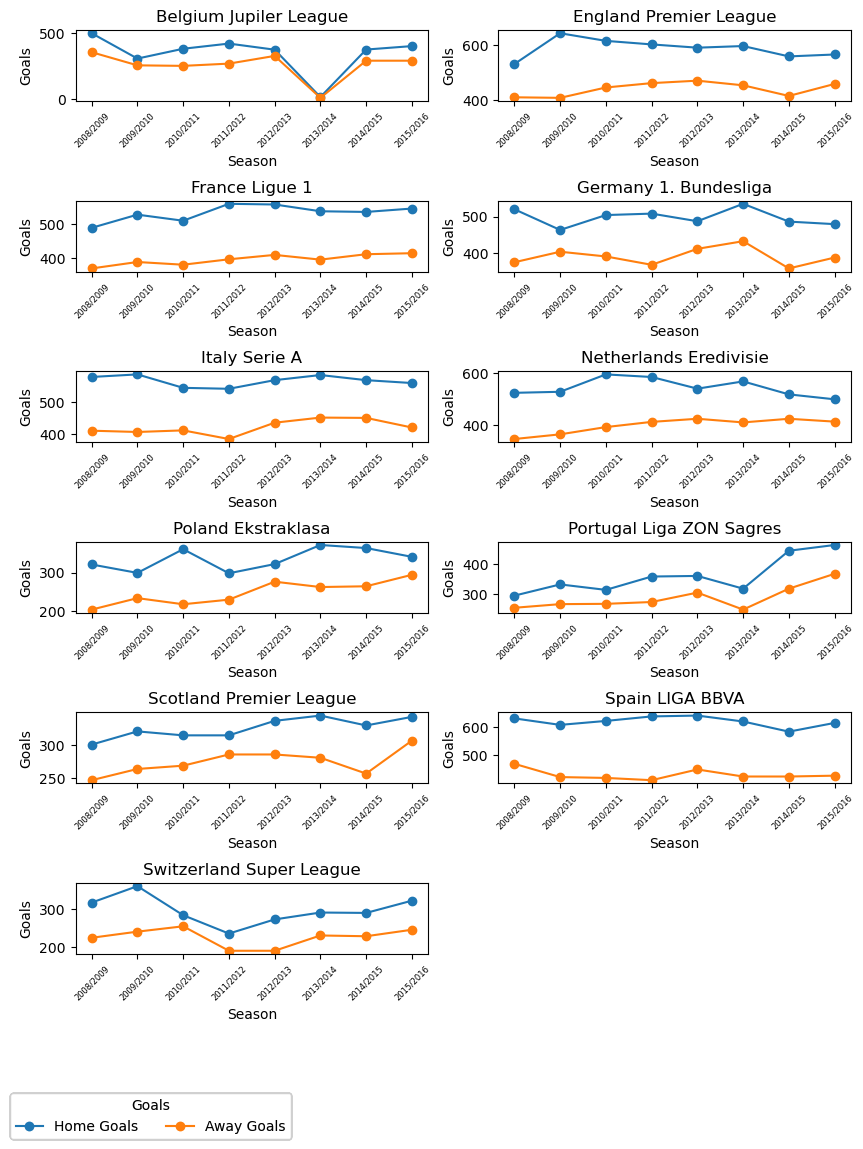

<IPython.core.display.Javascript object>

In [31]:
leagues = pivot_df.columns.get_level_values(1).unique()
num_rows = (len(leagues) + 1) // 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
if len(leagues) > 1:
    axes = axes.flatten()
for i, league in enumerate(leagues):
    data_home = pd.DataFrame(pivot_df[("home_goals", league)])
    data_away = pd.DataFrame(pivot_df[("away_goals", league)])
    ax = axes[i]
    line_home = data_home.plot(ax=ax, marker="o", label="Home Goals")
    line_away = data_away.plot(ax=ax, marker="o", label="Away Goals")
    ax.set_xlabel("Season")
    ax.set_ylabel("Goals")
    ax.set_title(league)
    ax.legend(
        labels=["Home Goals", "Away Goals"],
        prop={"size": 10},
        title="Goals",
        title_fontsize=10,
        loc="upper center",
        ncol=2,
        bbox_to_anchor=(0.2, 0),
        bbox_transform=plt.gcf().transFigure,
    )
    ax.set_xticks(range(len(pivot_df.index)))
    ax.set_xticklabels(pivot_df.index, rotation=45, fontsize=6)
if len(leagues) < num_rows * num_cols:
    for j in range(len(leagues), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.subplots_adjust(hspace=1.4, wspace=0.2)
plt.show()

* Plot visualize, that there are more goals scored by home team, so one aspect for better hand is being in home stadium.

### **Which players have the best ratings (TOP 10)?:**

* Since our teams attributes have records only from 2010-2016, we will take this term for future explorations.

In [32]:
df = pd.DataFrame(
    pd.read_sql_query(
        """SELECT pa.player_api_id, p.player_name, p.birthday, p.height, (p.weight * 0.45) As weight_kg, pa.date AS game_date, pa.overall_rating FROM Player_Attributes AS pa JOIN Player AS p ON pa.player_api_id=p.player_api_id""",
        conn,
    )
)
df[["birthday", "game_date"]] = df[["birthday", "game_date"]].apply(pd.to_datetime)
df.insert(2, "birth_year", df["birthday"].dt.year)
df.insert(3, "game_date_year", df["game_date"].dt.year)
df.insert(4, "Age", df["game_date_year"] - df["birth_year"])
df = df[(df["game_date_year"] >= 2010) & (df["game_date_year"] <= 2016)]
df.sort_values(["overall_rating", "game_date_year"], ascending=False, inplace=True)
df.drop_duplicates("player_name", inplace=True)
df.head(10)

,player_api_id,player_name,birth_year,game_date_year,Age,birthday,height,weight_kg,game_date,overall_rating
102482,30981,Lionel Messi,1987,2015,28,1987-06-24,170.18,71.55,2015-12-17,94.0
33330,30893,Cristiano Ronaldo,1985,2015,30,1985-02-05,185.42,79.20,2015-10-16,93.0
180723,39854,Xavi Hernandez,1980,2011,31,1980-01-25,170.18,66.60,2011-08-30,92.0
12788,30955,Andres Iniesta,1984,2012,28,1984-05-11,170.18,67.50,2012-02-22,91.0
109033,27299,Manuel Neuer,1986,2016,30,1986-03-27,193.04,91.35,2016-04-21,90.0
131464,19533,Neymar,1992,2016,24,1992-02-05,175.26,67.50,2016-02-04,90.0
16461,30834,Arjen Robben,1984,2015,31,1984-01-23,180.34,79.20,2015-09-25,90.0
105983,40636,Luis Suarez,1987,2015,28,1987-01-24,182.88,84.15,2015-10-16,90.0
58695,30924,Franck Ribery,1983,2014,31,1983-04-07,170.18,71.55,2014-02-28,90.0
183674,35724,Zlatan Ibrahimovic,1981,2014,33,1981-10-03,195.58,94.05,2014-10-17,90.0


<IPython.core.display.Javascript object>

### TOP winning teams in 2010-2016:

* Since we have already established that most of the wins are recorded when playing at home, we will continue to analyse the results from the perspective of those who played at home.
* Calculating if match was a home win, visitor win or draw. (home win - 3 points; draw - 0 points and home lose - 1 point).

In [33]:
def match_result(game_row):
    if game_row["home_team_goal"] > game_row["away_team_goal"]:
        return 3
    if game_row["home_team_goal"] == game_row["away_team_goal"]:
        return 0
    if game_row["home_team_goal"] < game_row["away_team_goal"]:
        return 1

<IPython.core.display.Javascript object>

In [34]:
matches = pd.DataFrame(
    pd.read_sql_query(
        """SELECT l.name, m.season, m.match_api_id, ht.team_long_name AS home_team, at.team_long_name AS away_team, m.home_team_goal, m.away_team_goal 
        FROM Match As m 
        JOIN League As l ON m.league_id=l.id 
        LEFT JOIN Team AS ht on ht.team_api_id = m.home_team_api_id
        LEFT JOIN Team AS at on at.team_api_id = m.away_team_api_id
        WHERE m.date BETWEEN '2010-01-01' AND '2016-12-31'""",
        conn,
    )
)
matches["result"] = matches.apply(lambda row: match_result(row), axis=1)
matches.head()

,name,season,match_api_id,home_team,away_team,home_team_goal,away_team_goal,result
0,Belgium Jupiler League,2009/2010,665626,RSC Anderlecht,Club Brugge KV,3,2,3
1,Belgium Jupiler League,2009/2010,665630,Sporting Charleroi,Standard de Liège,2,3,1
2,Belgium Jupiler League,2009/2010,665634,KV Mechelen,Beerschot AC,1,0,3
3,Belgium Jupiler League,2009/2010,665665,Club Brugge KV,KVC Westerlo,2,1,3
4,Belgium Jupiler League,2009/2010,665666,Standard de Liège,RSC Anderlecht,0,4,1


<IPython.core.display.Javascript object>

In [35]:
home_wins = pd.DataFrame(
    matches.loc[matches["result"] == 3, "home_team"]
    .value_counts()
    .reset_index()
    .values,
    columns=["team", "number_of_wins"],
)
print("Most home wins:")
home_wins.sort_index(axis=0, ascending=True).head()

Most home wins:


,team,number_of_wins
0,FC Barcelona,110
1,Real Madrid CF,107
2,Celtic,100
3,Manchester City,94
4,Manchester United,92


<IPython.core.display.Javascript object>

### Teams with most wins while visiting (2010-2016)?:

In [36]:
away_wins = pd.DataFrame(
    matches.loc[matches["result"] == 1, "away_team"]
    .value_counts()
    .reset_index()
    .values,
    columns=["team", "number_of_wins"],
)
print("Most wins while visiting:")
away_wins.sort_index(axis=0, ascending=True).head()

Most wins while visiting:


,team,number_of_wins
0,FC Barcelona,85
1,Real Madrid CF,84
2,Celtic,83
3,FC Bayern Munich,72
4,SL Benfica,71


<IPython.core.display.Javascript object>

### Teams with most wins in total 2010-2016?:

In [37]:
wins = pd.merge(home_wins, away_wins, on="team")
wins["number_of_wins"] = wins["number_of_wins_x"] + wins["number_of_wins_y"]
wins.drop(["number_of_wins_x", "number_of_wins_y"], axis=1, inplace=True)
wins.sort_values(by=["number_of_wins"], ascending=False).head()

,team,number_of_wins
0,FC Barcelona,195
1,Real Madrid CF,191
2,Celtic,183
5,FC Bayern Munich,164
6,Juventus,159


<IPython.core.display.Javascript object>

* plotting the percentage results of game results distribution:

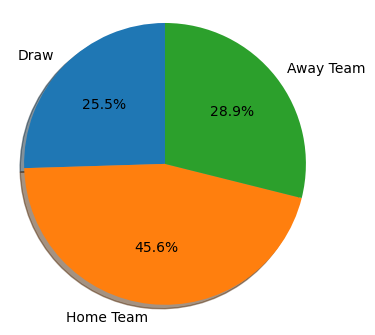

<IPython.core.display.Javascript object>

In [38]:
data = np.array([1, 0, 3], dtype=int)
data[0] = matches["result"].eq(0).sum()
data[1] = matches["result"].eq(3).sum()
data[2] = matches["result"].eq(1).sum()
labels = "Draw", "Home Team", "Away Team"
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(data, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis("equal")
plt.show()

* As you can see in the graph, home wins are clearly visible, while draws and away wins are similarly distributed.

* Is there a significant difference in the average goals scored between draw and visitor wins?
* Null hypothesis: There is no significant difference in the average goals scored between draw and visiting wins.
* Alternative hypothesis: There is a significant difference in the average goals scored between draw and visiting wins.

In [39]:
draw_goals = matches[matches["result"] == 0]["home_team_goal"]
visitor_goals = matches[matches["result"] == 1]["home_team_goal"]
t_statistic, p_value = stats.ttest_ind(draw_goals, visitor_goals)
alpha = 0.05
if p_value < alpha:
    result = "reject the null hypothesis and conclude that there is a significant difference in the average goals scored between draw and visiting wins."
else:
    result = "Fail to reject the null hypothesis. There is no significant difference in the average goals scored between draw and visiting wins."
print("t_statistic: ", t_statistic)
print("p_value: ", p_value)
print("Result:", result)
mean_defference = round((draw_goals.mean() - visitor_goals.mean()), 4)
print(
    "The difference between home scored goals and away scored goals: ", mean_defference
)

t_statistic:  27.193084211286262
p_value:  7.57910678452948e-158
Result: reject the null hypothesis and conclude that there is a significant difference in the average goals scored between draw and visiting wins.
The difference between home scored goals and away scored goals:  0.3956


<IPython.core.display.Javascript object>

* The score mean difference is 0.3956, which means that the number of goals scored by the away team is lesser than in a draw.
* Building confidence level: to estimate the average goals scored by visitors teams with 95% confidence.

In [40]:
visitors_goals = matches["away_team_goal"]
sample_mean = visitors_goals.mean()
sample_std = visitors_goals.std()
confidence_level = 0.95
standard_error = sample_std / np.sqrt(len(visitors_goals))
margin_of_error = standard_error * 1.96
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
print(
    "Visitors Scored Goals Confidence Interval ({}%): [{:.2f}, {:.2f}]".format(
        confidence_level * 100, lower_bound, upper_bound
    )
)

Visitors Scored Goals Confidence Interval (95.0%): [1.16, 1.19]


<IPython.core.display.Javascript object>

* Building confidence level: to estimate the average goals scored by home team to have a draw with 95% confidence

In [41]:
home_goals = matches[matches["result"] == 3]["home_team_goal"]
sample_mean = home_goals.mean()
sample_std = home_goals.std()
confidence_level = 0.95
standard_error = sample_std / np.sqrt(len(home_goals))
margin_of_error = standard_error * 1.96
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
print(
    "Home Scored Goals Confidence Interval ({}%): [{:.2f}, {:.2f}]".format(
        confidence_level * 100, lower_bound, upper_bound
    )
)

Home Scored Goals Confidence Interval (95.0%): [2.44, 2.49]


<IPython.core.display.Javascript object>

Mean home team goals: 1.5515669515669515
Median home team goals: 1.0
Quartiles of home team goals:
0.25    1.0
0.50    1.0
0.75    2.0
Name: home_team_goal, dtype: float64


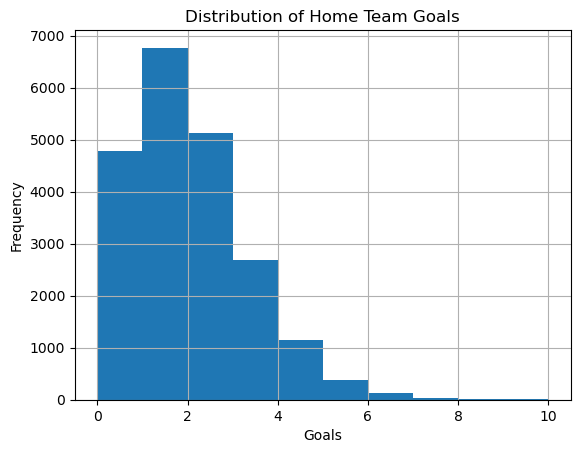

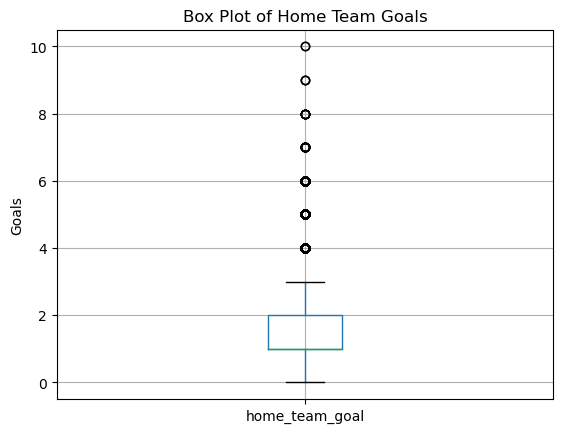

<IPython.core.display.Javascript object>

In [42]:
mean_home_goals = matches["home_team_goal"].mean()
median_home_goals = matches["home_team_goal"].median()
quartiles_home_goals = matches["home_team_goal"].quantile([0.25, 0.5, 0.75])
print("Mean home team goals:", mean_home_goals)
print("Median home team goals:", median_home_goals)
print("Quartiles of home team goals:")
print(quartiles_home_goals)

matches["home_team_goal"].hist(bins=10)
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.title("Distribution of Home Team Goals")
plt.show()

matches.boxplot(column="home_team_goal")
plt.ylabel("Goals")
plt.title("Box Plot of Home Team Goals")
plt.show()

Mean visitors team goals: 1.1706552706552706
Median visitors team goals: 1.0
Quartiles of visitors team goals:
0.25    0.0
0.50    1.0
0.75    2.0
Name: away_team_goal, dtype: float64


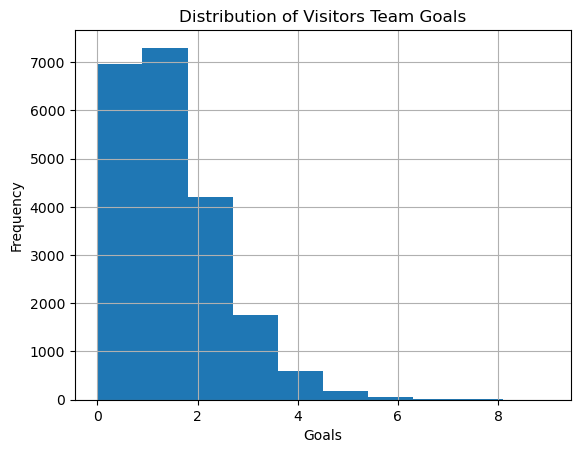

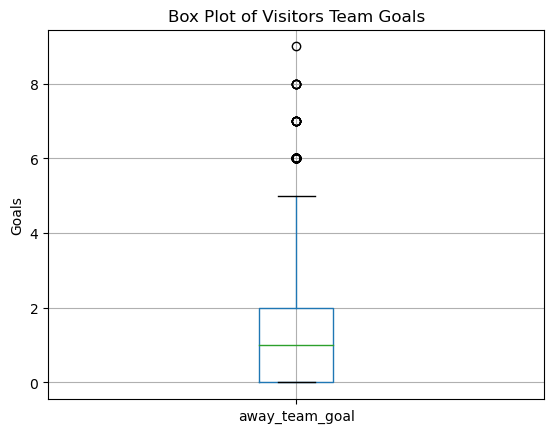

<IPython.core.display.Javascript object>

In [43]:
mean_away_goals = matches["away_team_goal"].mean()
median_away_goals = matches["away_team_goal"].median()
quartiles_away_goals = matches["away_team_goal"].quantile([0.25, 0.5, 0.75])
print("Mean visitors team goals:", mean_away_goals)
print("Median visitors team goals:", median_away_goals)
print("Quartiles of visitors team goals:")
print(quartiles_away_goals)


matches["away_team_goal"].hist(bins=10)
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.title("Distribution of Visitors Team Goals")
plt.show()

matches.boxplot(column="away_team_goal")
plt.ylabel("Goals")
plt.title("Box Plot of Visitors Team Goals")
plt.show()

### Which team made the best progress during 2010-2016 period ?:

* I need to merge team_attributes with team_data. Points_per_game is the best measure of team victories.
* Then I will perform Pearson correlation and t-test to find out the statistical significance.
* Calculate points of each team in each match,
* Aggregate team points to points per game of individual year, and save them to a new dataframe team_data

In [44]:
match = match_df
match["home_points"] = (match.home_team_goal > match.away_team_goal) * 3 + (
    match.home_team_goal == match.away_team_goal
) * 1
match["away_points"] = (match.home_team_goal < match.away_team_goal) * 3 + (
    match.home_team_goal == match.away_team_goal
) * 1

home_df = match[["home_team_api_id", "date", "home_team_goal", "home_points"]]
home_df.columns = ["team_api_id", "date", "goal", "points"]
away_df = match[["away_team_api_id", "date", "away_team_goal", "away_points"]]
away_df.columns = ["team_api_id", "date", "goal", "points"]
team_points_df = pd.concat([home_df, away_df])

team_points_df["year"] = team_points_df["date"].dt.year
team_data = pd.DataFrame()
team_data["total_goals"] = team_points_df.groupby(["team_api_id", "year"])["goal"].sum()
team_data["num_of_games"] = team_points_df.groupby(["team_api_id", "year"]).goal.count()
team_data["total_points"] = team_points_df.groupby(["team_api_id", "year"]).points.sum()
team_data["points_per_game"] = team_data["total_points"] / team_data["num_of_games"]
team_data.reset_index(inplace=True)
filtered_team_data = team_data[
    (team_data["year"] >= 2013)
    & (team_data["year"] <= 2016)
    & (team_data["num_of_games"] > 2)
]
team_data = pd.merge(filtered_team_data, team_df, on="team_api_id")
team_data.drop(
    columns=["id", "team_fifa_api_id", "team_short_name"],
    inplace=True,
)
team_data.head()

,team_api_id,year,total_goals,num_of_games,total_points,points_per_game,team_long_name
0,1601,2013,49,36,48,1.333333,Ruch Chorzów
1,1601,2014,33,28,35,1.250000,Ruch Chorzów
2,1601,2015,40,32,47,1.468750,Ruch Chorzów
3,1601,2016,10,9,8,0.888889,Ruch Chorzów
4,1773,2013,7,8,8,1.000000,Oud-Heverlee Leuven


<IPython.core.display.Javascript object>

* Filter out teams, that played at last 4 years

* A slope of point_per_game vs. year will be the best quantity to evaluate team improvements. So below I will calculate the slope. I will also create diagrams for visualization of the improvement.

In [45]:
team_improvement = team_data.groupby("team_long_name").apply(
    lambda v: stats.linregress(v.year, v.points_per_game)[0] if len(v) >= 3 else np.nan
)
team_improvement.sort_values(ascending=False).head(10)

team_long_name
Leicester City         0.763158
PSV                    0.340285
AZ                     0.310160
Zagłębie Lubin         0.295238
Heart of Midlothian    0.272295
FC Arouca              0.267465
BSC Young Boys         0.266667
Sassuolo               0.255838
SM Caen                0.236842
KVC Westerlo           0.230159
dtype: float64

<IPython.core.display.Javascript object>

* To check if these values of improvements are indeed at the upper end, I plot a histogram of team imporvements

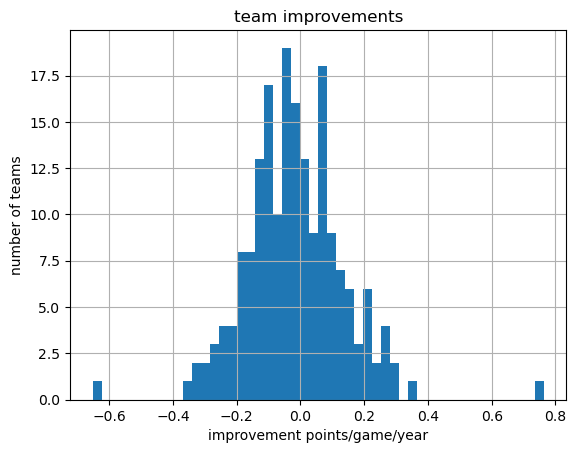

<IPython.core.display.Javascript object>

In [46]:

team_improvement.hist(bins=50)
plt.xlabel('improvement points/game/year')
plt.ylabel('number of teams')
plt.title('team improvements');


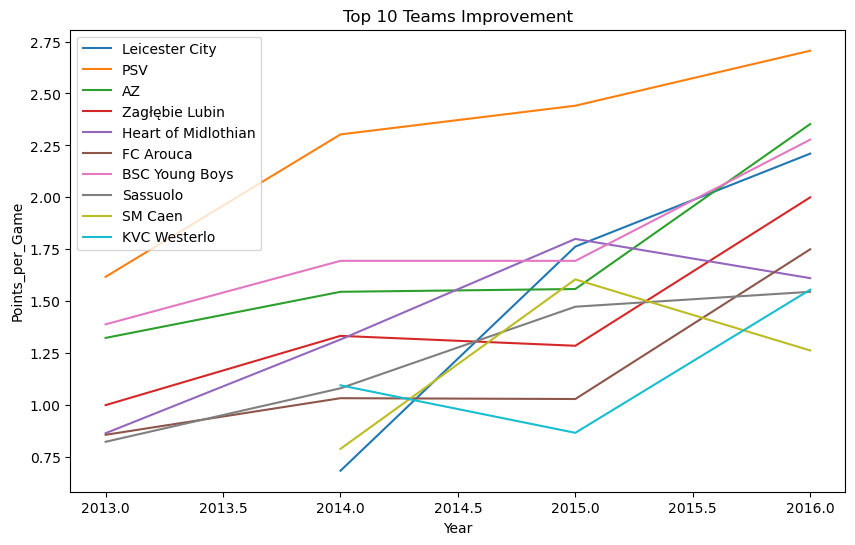

<IPython.core.display.Javascript object>

In [47]:
top_teams = team_improvement.sort_values(ascending=False).head(10)
top_teams_names = top_teams.index.tolist()

plt.figure(figsize=(10, 6))

for team_name in top_teams_names:
    x = team_data.query(f'team_long_name=="{team_name}"')["year"]
    y = team_data.query(f'team_long_name=="{team_name}"')["points_per_game"]
    plt.plot(x, y, label=team_name)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Points_per_Game")
plt.title("Top 10 Teams Improvement")
plt.show()

### What team gets most cards per game?

In [48]:
match = pd.DataFrame(pd.read_sql_query("""SELECT * FROM Match""", conn))
match["date"] = pd.to_datetime(match["date"], format="%Y-%m-%d")
match["year"] = match["date"].dt.year
match = match[(match["year"] >= 2010) & (match["year"] <= 2016)]
match = match[
    [
        "year",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "home_team_goal",
        "away_team_goal",
        "card",
    ]
]
match.isna().sum()

year                   0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
card                8960
dtype: int64

<IPython.core.display.Javascript object>

* From Match table we extract penalty cards for every game

In [49]:
def extract_card_data(data):

    match_api_ids = []
    team1_ids = []
    team2_ids = []
    yellow_card_home_team = []
    red_card_home_team = []
    yellow_card_away_team = []
    red_card_away_team = []

    for index, row in data.iterrows():
        xml_code = row["card"]
        match_api_id = row["match_api_id"]
        team1_id = row["home_team_api_id"]
        team2_id = row["away_team_api_id"]

        if pd.notnull(xml_code):
            try:
                root = ET.fromstring(xml_code)

                yellow_team_1 = 0
                red_team_1 = 0
                yellow_team_2 = 0
                red_team_2 = 0

                for value_elem in root.iter("value"):
                    card_type_elem = value_elem.find("card_type")
                    team_elem = value_elem.find("team")

                    if card_type_elem is not None and team_elem is not None:
                        card_type = card_type_elem.text
                        team_id = team_elem.text

                        if team_id == str(team1_id):
                            if card_type == "y":
                                yellow_team_1 += 1
                            elif card_type == "r":
                                red_team_1 += 1
                        elif team_id == str(team2_id):
                            if card_type == "y":
                                yellow_team_2 += 1
                            elif card_type == "r":
                                red_team_2 += 1
            except (ET.ParseError, ET.ElementTree.ParseError):

                yellow_team_1 = 0
                red_team_1 = 0
                yellow_team_2 = 0
                red_team_2 = 0
        else:

            yellow_team_1 = 0
            red_team_1 = 0
            yellow_team_2 = 0
            red_team_2 = 0

        match_api_ids.append(match_api_id)
        team1_ids.append(team1_id)
        team2_ids.append(team2_id)
        yellow_card_home_team.append(yellow_team_1)
        red_card_home_team.append(red_team_1)
        yellow_card_away_team.append(yellow_team_2)
        red_card_away_team.append(red_team_2)

    card_data = pd.DataFrame(
        {
            "match_api_id": match_api_ids,
            "team1_id": team1_ids,
            "team2_id": team2_ids,
            "yellow_card_home_team": yellow_card_home_team,
            "red_card_home_team": red_card_home_team,
            "yellow_card_away_team": yellow_card_away_team,
            "red_card_away_team": red_card_away_team,
        }
    )

    return card_data


card_data = extract_card_data(match)

<IPython.core.display.Javascript object>

* Merging cards with Match table and getting the dataset for counting total annual card penalties and average for card per year for every team.

In [50]:
merged_data = match.merge(
    card_data,
    left_on=["match_api_id", "home_team_api_id", "away_team_api_id"],
    right_on=["match_api_id", "team1_id", "team2_id"],
)
merged_data = merged_data[
    [
        "year",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "home_team_goal",
        "away_team_goal",
        "yellow_card_home_team",
        "red_card_home_team",
        "yellow_card_away_team",
        "red_card_away_team",
    ]
]
merged_data.head()

,year,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,yellow_card_home_team,red_card_home_team,yellow_card_away_team,red_card_away_team
0,2010,2010-02-03,665626,8635,8342,3,2,0,0,0,0
1,2010,2010-02-04,665630,9986,9985,2,3,0,0,0,0
2,2010,2010-02-02,665634,8203,9993,1,0,0,0,0,0
3,2010,2010-01-30,665665,8342,10001,2,1,0,0,0,0
4,2010,2010-01-17,665666,9985,8635,0,4,0,0,0,0


<IPython.core.display.Javascript object>

* The further calculations for annual card penalties for every team:

In [51]:
home_team_stats = merged_data.groupby(["year", "home_team_api_id"]).agg(
    No_matches=("match_api_id", "count"),
    team_id=("home_team_api_id", "first"),
    yellow_card_sum=("yellow_card_home_team", "sum"),
    red_card_sum=("red_card_home_team", "sum"),
)

away_team_stats = merged_data.groupby(["year", "away_team_api_id"]).agg(
    No_matches=("match_api_id", "count"),
    team_id=("away_team_api_id", "first"),
    yellow_card_sum=("yellow_card_away_team", "sum"),
    red_card_sum=("red_card_away_team", "sum"),
)
merged_stats = pd.merge(
    home_team_stats,
    away_team_stats,
    left_on=["year", "home_team_api_id"],
    right_on=["year", "away_team_api_id"],
    suffixes=("_home", "_away"),
    how="outer",
)

merged_stats["total_matches"] = (
    merged_stats["No_matches_home"] + merged_stats["No_matches_away"]
)
merged_stats["total_yellow"] = (
    merged_stats["yellow_card_sum_home"] + merged_stats["yellow_card_sum_away"]
)
merged_stats["total_red"] = (
    merged_stats["red_card_sum_home"] + merged_stats["red_card_sum_away"]
)

merged_stats = merged_stats.drop(
    [
        "No_matches_away",
        "yellow_card_sum_away",
        "red_card_sum_away",
        "No_matches_home",
        "yellow_card_sum_home",
        "red_card_sum_home",
        "team_id_away",
    ],
    axis=1,
)
merged_stats["aver_per_year_yellow"] = round(
    merged_stats["total_yellow"] / merged_stats["total_matches"], 2
)
merged_stats["aver_per_year_red"] = round(
    merged_stats["total_red"] / merged_stats["total_matches"], 2
)
merged_stats["index_temp"] = merged_stats.index
merged_stats = pd.merge(
    merged_stats,
    team_df[["team_api_id", "team_long_name"]],
    left_on="team_id_home",
    right_on="team_api_id",
    how="left",
)
merged_stats = home_team_stats = merged_data.groupby(["year", "home_team_api_id"]).agg(
    No_matches=("match_api_id", "count"),
    team_id=("home_team_api_id", "first"),
    yellow_card_sum=("yellow_card_home_team", "sum"),
    red_card_sum=("red_card_home_team", "sum"),
)

away_team_stats = merged_data.groupby(["year", "away_team_api_id"]).agg(
    No_matches=("match_api_id", "count"),
    team_id=("away_team_api_id", "first"),
    yellow_card_sum=("yellow_card_away_team", "sum"),
    red_card_sum=("red_card_away_team", "sum"),
)
merged_stats = pd.merge(
    home_team_stats,
    away_team_stats,
    left_on=["year", "home_team_api_id"],
    right_on=["year", "away_team_api_id"],
    suffixes=("_home", "_away"),
    how="outer",
)

merged_stats["total_matches"] = (
    merged_stats["No_matches_home"] + merged_stats["No_matches_away"]
)
merged_stats["total_yellow"] = (
    merged_stats["yellow_card_sum_home"] + merged_stats["yellow_card_sum_away"]
)
merged_stats["total_red"] = (
    merged_stats["red_card_sum_home"] + merged_stats["red_card_sum_away"]
)

merged_stats = merged_stats.drop(
    [
        "No_matches_away",
        "yellow_card_sum_away",
        "red_card_sum_away",
        "No_matches_home",
        "yellow_card_sum_home",
        "red_card_sum_home",
        "team_id_away",
    ],
    axis=1,
)
merged_stats["aver_per_year_yellow"] = round(
    merged_stats["total_yellow"] / merged_stats["total_matches"], 2
)
merged_stats["aver_per_year_red"] = round(
    merged_stats["total_red"] / merged_stats["total_matches"], 2
)
merged_stats["year"] = merged_stats.index
merged_stats = pd.merge(
    merged_stats,
    team_df[["team_api_id", "team_long_name"]],
    left_on="team_id_home",
    right_on="team_api_id",
    how="left",
)
merged_stats = merged_stats.set_index("year")
merged_stats = merged_stats[
    [
        "team_api_id",
        "team_long_name",
        "total_matches",
        "total_yellow",
        "total_red",
        "aver_per_year_yellow",
        "aver_per_year_red",
    ]
]
merged_stats.head()

,team_api_id,team_long_name,total_matches,total_yellow,total_red,aver_per_year_yellow,aver_per_year_red
year,,,,,,,
2010,1601,Ruch Chorzów,28,0,0,0.0,0.0
2010,1957,Jagiellonia Białystok,28,0,0,0.0,0.0
2010,2033,S.C. Olhanense,30,0,0,0.0,0.0
2010,2182,Lech Poznań,28,0,0,0.0,0.0
2010,2183,P. Warszawa,28,0,0,0.0,0.0


<IPython.core.display.Javascript object>

* Getting Teams with most card in total every year:

In [52]:
team_card_stats = (
    merged_stats.groupby(["year", "team_api_id", "team_long_name"]).sum().reset_index()
)
team_card_stats["total_cards"] = (
    team_card_stats["total_yellow"] + team_card_stats["total_red"]
)
team_with_most_cards = team_card_stats.loc[
    team_card_stats.groupby("year")["total_cards"].idxmax()
]
team_with_most_cards

,year,team_api_id,team_long_name,total_matches,total_yellow,total_red,aver_per_year_yellow,aver_per_year_red,total_cards
41,2010,8394,Real Zaragoza,39,127,5,3.26,0.13,132
254,2011,8394,Real Zaragoza,38,121,3,3.18,0.08,124
492,2012,8558,RCD Espanyol,39,144,2,3.69,0.05,146
676,2013,8370,Rayo Vallecano,38,128,3,3.37,0.08,131
881,2014,8305,Getafe CF,37,122,2,3.30,0.05,124
1125,2015,8558,RCD Espanyol,39,133,2,3.41,0.05,135
1277,2016,7878,Granada CF,21,77,1,3.67,0.05,78


<IPython.core.display.Javascript object>

### What team attributes determine how well you win?:

In [53]:
matches = pd.DataFrame(
    pd.read_sql_query(
        """SELECT m.match_api_id, m.date, m.home_team_api_id, m.away_team_api_id, m.home_team_goal, m.away_team_goal 
        FROM Match As m 
        JOIN League As l ON m.league_id=l.id 
        LEFT JOIN Team AS ht on ht.team_api_id = m.home_team_api_id
        LEFT JOIN Team AS at on at.team_api_id = m.away_team_api_id
        WHERE m.date BETWEEN '2010-01-01' AND '2016-12-31'""",
        conn,
    )
)
matches["result"] = matches.apply(lambda row: match_result(row), axis=1)
matches["date"] = pd.to_datetime(matches["date"])
matches["year"] = matches["date"].dt.year
matches.head()

,match_api_id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result,year
0,665626,2010-02-03,8635,8342,3,2,3,2010
1,665630,2010-02-04,9986,9985,2,3,1,2010
2,665634,2010-02-02,8203,9993,1,0,3,2010
3,665665,2010-01-30,8342,10001,2,1,3,2010
4,665666,2010-01-17,9985,8635,0,4,1,2010


<IPython.core.display.Javascript object>

* Since we know about home team advantage in winning, we take team attributes only from home team.

In [54]:
merged_data = matches.merge(
    team_attr_df, left_on="home_team_api_id", right_on="team_api_id", how="left"
)
merged_data.isna().sum()
merged_data = merged_data.dropna()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115747 entries, 0 to 115843
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   match_api_id                    115747 non-null  int64         
 1   date_x                          115747 non-null  datetime64[ns]
 2   home_team_api_id                115747 non-null  int64         
 3   away_team_api_id                115747 non-null  int64         
 4   home_team_goal                  115747 non-null  int64         
 5   away_team_goal                  115747 non-null  int64         
 6   result                          115747 non-null  int64         
 7   year_x                          115747 non-null  int64         
 8   id                              115747 non-null  float64       
 9   team_fifa_api_id                115747 non-null  float64       
 10  team_api_id                     115747 non-null  float64

<IPython.core.display.Javascript object>

In [55]:
merged_data = merged_data[
    [
        "year_x",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "result",
        "buildUpPlaySpeed",
        "buildUpPlaySpeedClass",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassing",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassing",
        "chanceCreationPassingClass",
        "chanceCreationCrossing",
        "chanceCreationCrossingClass",
        "chanceCreationShooting",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressure",
        "defencePressureClass",
        "defenceAggression",
        "defenceAggressionClass",
        "defenceTeamWidth",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ]
]
merged_data.head()

,year_x,match_api_id,home_team_api_id,away_team_api_id,result,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2010,665626,8635,8342,3,50.0,Balanced,Little,35.0,Mixed,Organised,70.0,Risky,50.0,Normal,60.0,Normal,Organised,70.0,High,50.0,Press,70.0,Wide,Cover
1,2010,665626,8635,8342,3,50.0,Balanced,Little,52.0,Mixed,Free Form,70.0,Risky,50.0,Normal,60.0,Normal,Organised,70.0,High,50.0,Press,70.0,Wide,Offside Trap
2,2010,665626,8635,8342,3,52.0,Balanced,Little,41.0,Mixed,Organised,53.0,Normal,57.0,Normal,47.0,Normal,Organised,45.0,Medium,43.0,Press,52.0,Normal,Cover
3,2010,665626,8635,8342,3,52.0,Balanced,Little,41.0,Mixed,Organised,68.0,Risky,67.0,Lots,47.0,Normal,Organised,60.0,Medium,43.0,Press,65.0,Normal,Cover
4,2010,665626,8635,8342,3,52.0,Balanced,Normal,51.0,Mixed,Organised,60.0,Normal,53.0,Normal,47.0,Normal,Organised,60.0,Medium,50.0,Press,65.0,Normal,Cover


<IPython.core.display.Javascript object>

* Once we have the overall table, let's separate it into a numeric table and a category table so that we can explain the relationship with the available results.

In [56]:
numeric_team_data = merged_data[
    [
        "result",
        "buildUpPlaySpeed",
        "buildUpPlayPassing",
        "chanceCreationPassing",
        "chanceCreationCrossing",
        "chanceCreationShooting",
        "defencePressure",
        "defenceAggression",
        "defenceTeamWidth",
    ]
]
numeric_team_data_train = merged_data[
    [
        "buildUpPlaySpeed",
        "buildUpPlayPassing",
        "chanceCreationPassing",
        "chanceCreationCrossing",
        "chanceCreationShooting",
        "defencePressure",
        "defenceAggression",
        "defenceTeamWidth",
    ]
]

transformed_data = np.sqrt(numeric_team_data_train)
transformed_data.describe()

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,115747.000000,115747.000000,115747.000000,115747.000000,115747.000000,115747.000000,115747.000000,115747.000000
mean,7.202087,6.858047,7.212778,7.312183,7.330473,6.777547,6.994664,7.200335
std,0.848111,0.806488,0.740080,0.777374,0.742868,0.758600,0.712468,0.678384
min,4.472136,4.472136,4.582576,4.472136,4.690416,4.795832,4.898979,5.385165
25%,6.708204,6.244998,6.855655,6.928203,7.000000,6.244998,6.557439,6.928203
50%,7.280110,6.928203,7.211103,7.280110,7.348469,6.782330,6.928203,7.211103
75%,7.937254,7.416198,7.745967,7.937254,7.937254,7.280110,7.483315,7.681146
max,8.944272,8.944272,8.944272,8.944272,8.944272,8.485281,8.485281,8.544004


<IPython.core.display.Javascript object>

* Initial values in the dataset had a relatively high spread from the mean, so I have uset transformation to normalize this spread.

In [57]:
transformed_data = pd.DataFrame(transformed_data, columns=transformed_data.columns)
target_variable = pd.DataFrame(numeric_team_data['result'], columns=['result'])
target_data = pd.concat([transformed_data, target_variable], axis=1)


<IPython.core.display.Javascript object>

* Calculating the correlation of numeric attributes and selecting 3 features.

In [58]:
correlation_matrix = target_data.corr()
correlation_with_target = (
    correlation_matrix["result"].abs().sort_values(ascending=False)
)
selected_features = correlation_with_target[
    correlation_with_target >= 0.03
].index.tolist()
print("Correlation_with_target:")
print(correlation_with_target)

print("Selected Features:")
print(selected_features)

Correlation_with_target:
result                    1.000000
defencePressure           0.062058
buildUpPlayPassing        0.054766
defenceAggression         0.031358
chanceCreationShooting    0.024583
defenceTeamWidth          0.021917
chanceCreationPassing     0.015714
chanceCreationCrossing    0.012673
buildUpPlaySpeed          0.010333
Name: result, dtype: float64
Selected Features:
['result', 'defencePressure', 'buildUpPlayPassing', 'defenceAggression']


<IPython.core.display.Javascript object>

* The Mean Squared Error = the lower the MSE, the better the model's performance in predicting the target variable.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    target_data[selected_features[1:]],
    target_data["result"],
    test_size=0.2,
    random_state=42,
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 1.6517570326315452
Root Mean Squared Error (RMSE): 1.2852069999154008
R-squared: 0.007652144963904539


<IPython.core.display.Javascript object>

* Make the same model but with scaling

In [60]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(target_data[selected_features[1:]])
scaled_target = scaler.fit_transform(target_data[["result"]])

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, scaled_target, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.9956104030622401
Root Mean Squared Error (RMSE): 0.9978027876600868
R-squared: 0.007652144963904428


<IPython.core.display.Javascript object>

* Overall, the results indicate that the linear regression model has a relatively high MSE and RMSE, indicating larger errors 
between predicted and actual values. Additionally, the low R-squared value suggests that the model is not performing well in 
explaining the variance in the target variable. These results suggest that the linear regression model may not be the most 
suitable approach for modeling the relationship between the selected features and the target variable.

* To find out whether these correlations are statistically significant, I perform Pearson correlations on them to find the p values.
* Pearson correlation between points_per_game and defencePressure

In [61]:
def calculate_correlations(df, attribute_list):
    target_variable = pd.DataFrame(numeric_team_data["result"], columns=["result"])

    correlations = {}
    for attribute in attribute_list:
        correlation_coeff, p_value = stats.pearsonr(
            df[attribute], target_variable["result"]
        )
        correlations[attribute] = (correlation_coeff, p_value)

    return correlations


attribute_list = [
    "defencePressure",
    "buildUpPlayPassing",
    "chanceCreationShooting",
    "defenceAggression",
]

correlations = calculate_correlations(target_data, attribute_list)
print(correlations)

{'defencePressure': (0.06205794000721539, 3.934849466508184e-99), 'buildUpPlayPassing': (-0.054765669704008854, 1.3620000794186766e-77), 'chanceCreationShooting': (0.024582517733195905, 6.034884673679653e-17), 'defenceAggression': (0.03135753637025339, 1.3934927954208038e-26)}


<IPython.core.display.Javascript object>

 * These results indicate that there are very weak correlations between the selected attributes and the target variable. The p-values indicate strong evidence to reject the null hypothesis of no correlation. However, it's important to note that the correlations are quite small, suggesting that these attributes may not have a strong linear relationship with the target variable.

* Lets pick up categorical features:

* Using Cramér's V statistic measures that works only with categorical values, therefore I am changing 'result' value meaning accordingly.

In [62]:
merged_data["result"] = merged_data["result"].replace({3: "win", 0: "draw", 1: "lose"})

category_team_data = merged_data[
    [
        "result",
        "buildUpPlaySpeedClass",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassingClass",
        "chanceCreationCrossingClass",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressureClass",
        "defenceAggressionClass",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ]
]
category_team_data_train = merged_data[
    [
        "buildUpPlaySpeedClass",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassingClass",
        "chanceCreationCrossingClass",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressureClass",
        "defenceAggressionClass",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ]
]

<IPython.core.display.Javascript object>

* The Cramér's V statistic measures the strength of association between a categorical attribute and the points_per_game variable.
A higher value of Cramér's V indicates a stronger association.

* Calculation formula: Cramer’s V = √(chi2/n) / min(columns_no-1, rows_no-1)
where:<br>
chi2: The Chi-square statistic<br>
sample_size: Total sample size<br>
rows_no: Number of rows<br>
columns_no: Number of columns

In [63]:
good_association_threshold = 0.09
weak_association_threshold = 0.01
results = []

for attribute in category_team_data_train:
    contingency_table = pd.crosstab(
        category_team_data_train[attribute], category_team_data["result"]
    )
    chi2, _, _, _ = chi2_contingency(contingency_table)
    sample_size = contingency_table.sum().sum()
    phi2 = chi2 / sample_size
    rows_no, columns_no = contingency_table.shape
    phi2corr = max(0, phi2 - ((columns_no - 1) * (rows_no - 1)) / (sample_size - 1))
    rcorr = rows_no - ((rows_no - 1) ** 2) / (sample_size - 1)
    kcorr = columns_no - ((columns_no - 1) ** 2) / (sample_size - 1)
    cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    results.append((attribute, cramers_v))

good_associations = []
weak_associations = []

for attribute, cramers_v in results:
    if cramers_v >= good_association_threshold:
        good_associations.append((attribute, cramers_v))
    elif cramers_v >= weak_association_threshold:
        weak_associations.append((attribute, cramers_v))

good_associations.sort(key=lambda x: x[1], reverse=True)
weak_associations.sort(key=lambda x: x[1], reverse=True)

print("Good Associations:")
for attribute, cramers_v in good_associations:
    print(f"Cramér's V for attribute {attribute}: {cramers_v}")

print("\nWeak Associations:")
for attribute, cramers_v in weak_associations:
    print(f"Cramér's V for attribute {attribute}: {cramers_v}")

Good Associations:
Cramér's V for attribute chanceCreationPositioningClass: 0.09358307830517194
Cramér's V for attribute buildUpPlayPositioningClass: 0.09107737761625956

Weak Associations:
Cramér's V for attribute chanceCreationShootingClass: 0.04657904791999505
Cramér's V for attribute buildUpPlayPassingClass: 0.04041623430382145
Cramér's V for attribute defenceDefenderLineClass: 0.022085061561121607
Cramér's V for attribute chanceCreationPassingClass: 0.02001966825695778
Cramér's V for attribute buildUpPlaySpeedClass: 0.019408898072066482
Cramér's V for attribute defencePressureClass: 0.019366338009530432
Cramér's V for attribute chanceCreationCrossingClass: 0.016415045042176356
Cramér's V for attribute buildUpPlayDribblingClass: 0.011972363480543334


<IPython.core.display.Javascript object>

## Prediction:

* Main question is to try to predict what team might win/draw/lose:

In [64]:
match_df = pd.DataFrame(
    pd.read_sql_query(
        """
    SELECT date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal,
    CASE
        WHEN home_team_goal > away_team_goal THEN 'win'
        WHEN home_team_goal = away_team_goal THEN 'draw'
        WHEN home_team_goal < away_team_goal THEN 'lose'
    END AS result
    FROM Match
    """,
        conn,
    )
)
match_df["date"] = pd.to_datetime(match_df["date"], format="%Y-%m-%d")
match_df["year"] = match_df["date"].dt.year
match_df = match_df[(match_df["year"] >= 2010) & (match_df["year"] <= 2016)]

<IPython.core.display.Javascript object>

* Team attributes are only from 2010-2016. we will take this time scale for prediction modeling.

In [65]:
merged_all = pd.merge(
    match_df,
    team_attr_df,
    left_on=["home_team_api_id", "year"],
    right_on=["team_api_id", "year"],
    how="inner",
)
merged_all = pd.merge(
    merged_all,
    team_attr_df,
    left_on=["away_team_api_id", "year"],
    right_on=["team_api_id", "year"],
    how="inner",
    suffixes=("_home", "_away"),
)
merged_all["result"] = merged_all.apply(lambda row: match_result(row), axis=1)
merged_all.head()

,date_x,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result,year,id_home,team_fifa_api_id_home,team_api_id_home,date_y,buildUpPlaySpeed_home,buildUpPlaySpeedClass_home,buildUpPlayDribblingClass_home,buildUpPlayPassing_home,buildUpPlayPassingClass_home,buildUpPlayPositioningClass_home,chanceCreationPassing_home,chanceCreationPassingClass_home,chanceCreationCrossing_home,chanceCreationCrossingClass_home,chanceCreationShooting_home,chanceCreationShootingClass_home,chanceCreationPositioningClass_home,defencePressure_home,defencePressureClass_home,defenceAggression_home,defenceAggressionClass_home,defenceTeamWidth_home,defenceTeamWidthClass_home,defenceDefenderLineClass_home,id_away,team_fifa_api_id_away,team_api_id_away,date,buildUpPlaySpeed_away,buildUpPlaySpeedClass_away,buildUpPlayDribblingClass_away,buildUpPlayPassing_away,buildUpPlayPassingClass_away,buildUpPlayPositioningClass_away,chanceCreationPassing_away,chanceCreationPassingClass_away,chanceCreationCrossing_away,chanceCreationCrossingClass_away,chanceCreationShooting_away,chanceCreationShootingClass_away,chanceCreationPositioningClass_away,defencePressure_away,defencePressureClass_away,defenceAggression_away,defenceAggressionClass_away,defenceTeamWidth_away,defenceTeamWidthClass_away,defenceDefenderLineClass_away
0,2010-02-03,665626,8635,8342,3,2,3,2010,46,229,8635,2010-02-22,50,Balanced,Little,35,Mixed,Organised,70,Risky,50,Normal,60,Normal,Organised,70,High,50,Press,70,Wide,Cover,319,231,8342,2010-02-22,35,Balanced,Little,40,Mixed,Organised,45,Normal,50,Normal,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover
1,2010-11-07,838635,8635,8342,2,2,0,2010,46,229,8635,2010-02-22,50,Balanced,Little,35,Mixed,Organised,70,Risky,50,Normal,60,Normal,Organised,70,High,50,Press,70,Wide,Cover,319,231,8342,2010-02-22,35,Balanced,Little,40,Mixed,Organised,45,Normal,50,Normal,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover
2,2010-09-19,838544,9986,8342,0,5,1,2010,1188,670,9986,2010-02-22,40,Balanced,Little,50,Mixed,Organised,45,Normal,43,Normal,60,Normal,Organised,70,High,70,Double,70,Wide,Cover,319,231,8342,2010-02-22,35,Balanced,Little,40,Mixed,Organised,45,Normal,50,Normal,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover
3,2010-12-10,838714,8203,8342,0,1,1,2010,660,110724,8203,2010-02-22,65,Balanced,Little,60,Mixed,Organised,50,Normal,40,Normal,50,Normal,Organised,60,Medium,70,Double,60,Normal,Cover,319,231,8342,2010-02-22,35,Balanced,Little,40,Mixed,Organised,45,Normal,50,Normal,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover
4,2010-02-28,665737,9997,8342,1,1,0,2010,1234,680,9997,2010-02-22,50,Balanced,Little,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,50,Medium,50,Press,50,Normal,Cover,319,231,8342,2010-02-22,35,Balanced,Little,40,Mixed,Organised,45,Normal,50,Normal,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover


<IPython.core.display.Javascript object>

In [66]:
merged_num = merged_all[
    [
        "year",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "result",
        "buildUpPlaySpeed_home",
        "buildUpPlayPassing_home",
        "chanceCreationPassing_home",
        "chanceCreationCrossing_home",
        "chanceCreationShooting_home",
        "defencePressure_home",
        "defenceAggression_home",
        "defenceTeamWidth_home",
        "buildUpPlaySpeed_away",
        "buildUpPlayPassing_away",
        "chanceCreationPassing_away",
        "chanceCreationCrossing_away",
        "chanceCreationShooting_away",
        "defencePressure_away",
        "defenceAggression_away",
        "defenceTeamWidth_away",
    ]
]

<IPython.core.display.Javascript object>

* Merging data with cards and match information and adding card averrage per year:

In [67]:
numeric_match = merged_num.merge(
    merged_stats,
    left_on=["home_team_api_id", "year"],
    right_on=["team_api_id", "year"],
    how="left",
)
numeric_match.drop(
    columns=[
        "team_api_id",
        "team_long_name",
        "total_matches",
        "total_yellow",
        "total_red",
    ],
    inplace=True,
)
numeric_match.head()

,year,match_api_id,home_team_api_id,away_team_api_id,result,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away,aver_per_year_yellow,aver_per_year_red
0,2010,665626,8635,8342,3,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,0.0,0.0
1,2010,838635,8635,8342,0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,0.0,0.0
2,2010,838544,9986,8342,1,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,0.0,0.0
3,2010,838714,8203,8342,1,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,0.0,0.0
4,2010,665737,9997,8342,0,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,0.0,0.0


<IPython.core.display.Javascript object>

* Using both methods to transform numeric features: standartization and normalization, to see the difference in results:

In [68]:
selected_data = numeric_match.iloc[:, 4:]
numeric_features = numeric_match.iloc[:, 5:]
target = numeric_match.iloc[:, 4]

<IPython.core.display.Javascript object>

In [69]:
scaler = StandardScaler()
stand_data = scaler.fit_transform(numeric_features)
stand_df = pd.DataFrame(stand_data, columns=numeric_features.columns)
stand_df.describe()

,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away,aver_per_year_yellow,aver_per_year_red
count,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04,1.824300e+04
mean,2.036559e-15,1.220436e-15,3.163189e-15,3.084257e-17,-1.584418e-15,5.096610e-15,2.133974e-15,1.120179e-15,2.243179e-15,2.183067e-15,-1.593504e-15,7.078588e-16,2.677790e-15,-6.890041e-16,-1.517104e-15,3.645022e-15,-1.187544e-14,3.768761e-15
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-2.746483e+00,-2.500228e+00,-2.998731e+00,-3.044820e+00,-3.043394e+00,-2.273494e+00,-2.560260e+00,-2.436783e+00,-2.750489e+00,-2.502708e+00,-2.994539e+00,-3.045562e+00,-3.039381e+00,-2.270279e+00,-2.555107e+00,-2.437505e+00,-1.132925e+00,-7.860396e-01
25%,-6.451152e-01,-7.952434e-01,-5.217970e-01,-5.429399e-01,-4.961214e-01,-7.244361e-01,-5.599036e-01,-4.476481e-01,-6.452086e-01,-7.963140e-01,-5.232925e-01,-5.423756e-01,-5.887369e-01,-7.236533e-01,-5.567011e-01,-4.492183e-01,-1.132925e+00,-7.860396e-01
50%,2.732250e-02,1.021170e-01,-4.546357e-02,-9.617566e-02,-2.440424e-02,-4.672309e-02,-1.598323e-01,-2.888293e-02,2.848124e-02,1.017878e-01,-4.805280e-02,-9.537809e-02,-2.320351e-02,-4.700472e-02,-1.570200e-01,-3.063165e-02,2.382987e-01,-1.641508e-01
75%,8.678696e-01,6.405332e-01,7.166700e-01,7.973528e-01,8.246866e-01,6.309899e-01,6.403104e-01,7.039562e-01,8.705935e-01,6.406489e-01,7.123308e-01,7.986169e-01,8.250965e-01,6.296439e-01,6.423424e-01,7.018950e-01,7.793257e-01,4.577381e-01
max,2.296800e+00,2.883934e+00,2.622004e+00,2.316351e+00,2.428525e+00,2.470497e+00,2.240596e+00,2.169634e+00,2.302184e+00,2.885904e+00,2.613290e+00,2.318408e+00,2.427441e+00,2.466261e+00,2.241067e+00,2.166948e+00,2.383751e+00,5.018256e+00


<IPython.core.display.Javascript object>

In [70]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_features)
norm_df = pd.DataFrame(normalized_data, columns=numeric_features.columns)
norm_df.describe()

,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away,aver_per_year_yellow,aver_per_year_red
count,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000
mean,0.544582,0.464367,0.533512,0.567939,0.556184,0.479237,0.533292,0.528997,0.544363,0.464444,0.533993,0.567781,0.555969,0.479312,0.532739,0.529380,0.322158,0.135424
std,0.198289,0.185735,0.177918,0.186532,0.182756,0.210799,0.208302,0.217094,0.197920,0.185582,0.178327,0.186434,0.182927,0.211130,0.208505,0.217187,0.284367,0.172291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.416667,0.316667,0.440678,0.466667,0.465517,0.326531,0.416667,0.431818,0.416667,0.316667,0.440678,0.466667,0.448276,0.326531,0.416667,0.431818,0.000000,0.000000
50%,0.550000,0.483333,0.525424,0.550000,0.551724,0.469388,0.500000,0.522727,0.550000,0.483333,0.525424,0.550000,0.551724,0.469388,0.500000,0.522727,0.389920,0.107143
75%,0.716667,0.583333,0.661017,0.716667,0.706897,0.612245,0.666667,0.681818,0.716667,0.583333,0.661017,0.716667,0.706897,0.612245,0.666667,0.681818,0.543767,0.214286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

* Calculating correlations:

In [71]:
stand_corr = (
    pd.concat([stand_df, numeric_match.iloc[:, 4]], axis=1)
    .corr()["result"]
    .sort_values(ascending=False)
)
norm_corr = (
    pd.concat([norm_df, numeric_match.iloc[:, 4]], axis=1)
    .corr()["result"]
    .sort_values(ascending=False)
)

print("Standardized Data Correlation:")
print(stand_corr)

print("\nNormalized Data Correlation:")
print(norm_corr)

stand_corr_filtered = stand_corr[(stand_corr > 0.04) | (stand_corr < -0.04)]
norm_corr_filtered = norm_corr[(norm_corr > 0.04) | (norm_corr < -0.04)]

print("Standardized Data Correlation:")
print(stand_corr_filtered)

print("\nNormalized Data Correlation:")
print(norm_corr_filtered)

Standardized Data Correlation:
result                         1.000000
defencePressure_home           0.067391
chanceCreationShooting_home    0.040669
buildUpPlayPassing_away        0.034923
defenceAggression_home         0.024470
defenceTeamWidth_home          0.020336
chanceCreationPassing_home     0.017151
chanceCreationCrossing_home    0.014023
chanceCreationPassing_away    -0.005686
aver_per_year_yellow          -0.008282
aver_per_year_red             -0.009668
buildUpPlaySpeed_away         -0.010594
buildUpPlaySpeed_home         -0.013096
defenceTeamWidth_away         -0.016849
chanceCreationShooting_away   -0.020110
defenceAggression_away        -0.022035
chanceCreationCrossing_away   -0.023090
defencePressure_away          -0.047339
buildUpPlayPassing_home       -0.055072
Name: result, dtype: float64

Normalized Data Correlation:
result                         1.000000
defencePressure_home           0.067391
chanceCreationShooting_home    0.040669
buildUpPlayPassing_away       

<IPython.core.display.Javascript object>

* Note: Even if we thought that cards could be an influential feature, they are not. After all, cards are a personal assessment of players' behaviour.

### model = LinearRegression()

In [72]:
X = numeric_match[
    [
        "defencePressure_home",
        "chanceCreationShooting_home",
        "defencePressure_away",
        "buildUpPlayPassing_home",
    ]
]
y = numeric_match["result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mse_scorer = make_scorer(mean_squared_error)


cv_scores = -cross_val_score(model, X, y, cv=5, scoring=mse_scorer)


mean_mse = np.mean(cv_scores)

print("Cross-Validation Mean Squared Error:", mean_mse)

Mean Squared Error: 1.652369260896741
Cross-Validation Mean Squared Error: -1.633674883238363


<IPython.core.display.Javascript object>

* The Cross-Validation Mean Squared Error of -1.65 suggests that, on average, the model performs slightly better (lower MSE) when evaluated using cross-validation than when evaluated on the test set. 
* Overall, the model's performance seems decent with a reasonably low MSE, but it's always a good idea to compare the results with other models or consider additional evaluation metrics to get a more comprehensive understanding of the model's performance.

### model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [73]:
X = numeric_match[['defencePressure_home', 'chanceCreationShooting_home', 'defencePressure_away', 'buildUpPlayPassing_home']]
y = numeric_match['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.4538229651959441
Precision: 0.5826092568705258
Recall: 0.4538229651959441
F1 Score: 0.31470378812753286
ROC AUC Score: 0.5502649485671157


<IPython.core.display.Javascript object>

* Accuracy: The accuracy score measures the proportion of correctly predicted labels (results) out of the total number of samples in the test set. Model's predictions match the true labels with an accuracy of 45.4%.

* Precision: Precision is a metric that calculates the weighted average of the precision scores for each class. It considers both the number of true positive predictions and false positive predictions. The precision score ranges from 0 to 1, with a higher value indicating a better precision. Model's predictions have moderate precision.

* Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive labels (results) out of the actual positive samples in the test set. It considers both the number of true positive predictions and false negative predictions. Higher value indicating a better recall. Model captures only 45.4% of the actual positive samples.

* F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when the dataset is imbalanced. The F1 score ranges from 0 to 1, with a higher value indicating a better balance between precision and recall. Model's performance is relatively low in terms of the balance between precision and recall.

* ROC AUC Score: The ROC AUC (Receiver Operating Characteristic Area Under Curve) score measures the model's ability to discriminate between different classes. It considers the probabilities predicted by the model and calculates the area under the ROC curve. Model has some ability to distinguish between different classes, although the performance is moderate.

* Now we work with categorical features taking Cramers V results into consideration 

In [74]:
categorical_columns = [
    "match_api_id",
    "buildUpPlayPositioningClass_home",
    "chanceCreationPositioningClass_home",
    "buildUpPlayPositioningClass_away",
    "chanceCreationPositioningClass_away",
]

encoder = OneHotEncoder(sparse=False, drop="first")
encoded_features = encoder.fit_transform(merged_all[categorical_columns[1:]])


X = encoded_features
y = merged_all["result"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.4527267744587558
Precision: 0.5844211893530875
Recall: 0.4527267744587558
F1 Score: 0.33110030817147834
ROC AUC Score: 0.5468225199443497


<IPython.core.display.Javascript object>

* Merging both numeric and categorical datasets:

In [75]:
merged_data = pd.merge(
    numeric_match, merged_all[categorical_columns], on="match_api_id", how="left"
)
merged_data.drop(columns=["aver_per_year_yellow", "aver_per_year_red"], inplace=True)
merged_data.head()

,year,match_api_id,home_team_api_id,away_team_api_id,result,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away,buildUpPlayPositioningClass_home,chanceCreationPositioningClass_home,buildUpPlayPositioningClass_away,chanceCreationPositioningClass_away
0,2010,665626,8635,8342,3,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,Organised,Organised,Organised,Organised
1,2010,838635,8635,8342,0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,Organised,Organised,Organised,Organised
2,2010,838544,9986,8342,1,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,Organised,Organised,Organised,Organised
3,2010,838714,8203,8342,1,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,Organised,Organised,Organised,Organised
4,2010,665737,9997,8342,0,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,Organised,Organised,Organised,Organised


<IPython.core.display.Javascript object>

In [76]:
encoder = OneHotEncoder(sparse=False, drop="first")
encoded_features = encoder.fit_transform(merged_data.iloc[:, -4:])


scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.iloc[:, 5:-4])


X = np.concatenate([scaled_features, encoded_features], axis=1)
y = merged_data["result"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.45848177582899424
Precision: 0.5886608772411672
Recall: 0.45848177582899424
F1 Score: 0.34533810699590256
ROC AUC Score: 0.5732828536945207


<IPython.core.display.Javascript object>

* Accuracy: The accuracy score of 0.458 indicates that the model correctly predicts the class of approximately 45.8% of the instances in the test set.

* Precision: The precision score of 0.588 suggests that when the model predicts a particular class, it is correct approximately 58..8 % of the time on average.

* Recall: The recall score of 0.458 indicates that the model correctly identifies approximately 45.8% of the instances belonging to a particular class.

* F1 Score: The F1 score provides a single metric to evaluate the model's overall performance, considering both precision and recall.

* ROC AUC Score: The ROC AUC score of 0.573 suggests that the model has a moderate ability to distinguish between different classes.

* Overall, the model's performance evaluation indicates that there is room for improvement. The accuracy, precision, recall, and F1 score are relatively low, indicating that the model may not be capturing the underlying patterns and relationships in the data effectively.

### Conclusions:

When working with this large database, it should be mentioned that the database covers almost all major European football leagues from 2008 to 2016.
* Different data tables and additional data were not collected in the same periods (e.g. team attributes were filled in from 2010 on).Therefore, all calculations and assumptions were made only for this period.
 
* The 11 leagues play a different number of matches and the number of teams participating in the championships is different. By 2015, as many as 4 countries have 20 teams playing in each league, with the smallest number of teams in the Swiss league - 10. Over the whole period (2008-2016), the countries with the most teams played 3,040 matches each (380 per season).

* The aim of the paper was to find the features that allow to predict the match result using LinearRegression and LogisticRegression models. 
* The focus was on the details of the team and the match. FC Barcelona has been the most successful club both home and away (most wins).
* The details and physical characteristics of the players were not focused on because the data does not reveal what time the player was on the field, how much he spent playing, so that I could confidently state his contribution to the successful end of the match. This task could be for the future.
* The general and clear observation is that a team has a better chance of winning when playing in its own stadium (as shown by the plots and hypothesis).  The result of a drawn match is meaningful compared to the probability of an away win, i.e. a draw is more likely than an away win. In this case, the home team scores between [2.44, 2.49] goals against the visitors. The visitors team scores between [1.16, 1.19] goals.
* The prediction of the result was carried out in 3 steps: selecting the numerical properties of the team and the match, selecting the categorical properties and carrying out module on each group separately. In the last step, the two groups were combined and a joint modeling was performed with the following conclusions:the model's performance evaluation indicates that there is room for improvement. The accuracy, precision, recall, and F1 score are relatively low, indicating that the model may not be capturing the underlying patterns and relationships in the data effectively. The final accuracy score of 0.458 indicates that the model correctly predicts the class of approximately 45.8% of the instances in the test set.

## Improvement:

Further training in prediction modelling and improving the quality of the presentation is a must. More theory and exercise skills are needed, as well as more statistics and mathematics for future projects.